# Thailand Country

In [1]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
menhap_df = pd.read_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/final_data.xlsx")
menhap_df

,country,year,Schizophrenia,Bipolar,Eating_Disorders,Anxiety,Drug_Use,Depression,Alcohol_Use,Life_Ladder,Log_GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Positive_Affect,Negative_Affect,Ladder_Std_Dev,GINI_Index
0,Brunei,1990,0.274544,0.617719,0.550731,3.548453,0.911231,2.577977,0.771017,6.233732,10.826301,0.790585,70.994705,0.767580,0.073472,0.062403,0.569497,0.166263,2.052102,0.622453
1,Brunei,1991,0.273819,0.618347,0.548010,3.554565,0.910156,2.562828,0.770862,6.437663,11.145486,0.793567,73.141360,0.789073,0.054550,0.226984,0.550824,0.112444,2.006036,0.584078
2,Brunei,1992,0.273212,0.618986,0.545544,3.561621,0.910287,2.551382,0.770430,6.586561,10.776199,0.823234,73.563922,0.787172,0.043634,0.148619,0.712836,0.185052,2.053332,0.560275
3,Brunei,1993,0.272736,0.619673,0.543644,3.569155,0.910409,2.543804,0.769584,6.821280,11.119712,0.811811,71.970894,0.801130,0.071169,0.054491,0.472039,0.127140,2.031076,0.612157
4,Brunei,1994,0.272383,0.620342,0.542626,3.576319,0.908915,2.538465,0.768343,6.192638,10.400065,0.752147,73.270498,0.705897,0.086336,0.107812,0.650715,0.138546,2.073008,0.559053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Vietnam,2013,0.241026,0.550479,0.119353,2.039645,0.673579,2.884934,1.722689,5.022699,8.541249,0.759477,65.545815,0.919607,-0.024637,0.771246,0.718431,0.165225,1.404304,0.381849
304,Vietnam,2014,0.241883,0.551005,0.121583,2.045305,0.677829,2.882767,1.728448,5.084923,8.588622,0.792168,65.677925,0.845240,0.002126,0.779896,0.701386,0.240607,1.769163,0.414816
305,Vietnam,2015,0.242783,0.551548,0.123609,2.051937,0.682933,2.881750,1.733233,5.076315,8.642591,0.848677,65.810028,0.897333,0.087220,0.747188,0.642237,0.232416,1.794858,0.398138
306,Vietnam,2016,0.243709,0.552084,0.126256,2.059037,0.687896,2.879813,1.736929,5.062267,8.692120,0.876324,65.942139,0.894351,-0.088430,0.799240,0.536226,0.222550,1.767819,0.375812


In [3]:
menhap_df.dtypes

country                object
year                    int64
Schizophrenia         float64
Bipolar               float64
Eating_Disorders      float64
Anxiety               float64
Drug_Use              float64
Depression            float64
Alcohol_Use           float64
Life_Ladder           float64
Log_GDP_per_Capita    float64
Social_Support        float64
Life_Expectancy       float64
Freedom               float64
Generosity            float64
Corruption            float64
Positive_Affect       float64
Negative_Affect       float64
Ladder_Std_Dev        float64
GINI_Index            float64
dtype: object

In [4]:
lifeladder_df = menhap_df.loc[:, ["year", 'country', 'Life_Ladder']]
lifeladder_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
...,...,...,...
303,2013,Vietnam,5.022699
304,2014,Vietnam,5.084923
305,2015,Vietnam,5.076315
306,2016,Vietnam,5.062267


In [5]:
# Mengambil data untuk country tertentu
thai_df = lifeladder_df.loc[lifeladder_df['country'] == 'Thailand']
thai_df['year'] = pd.to_datetime(thai_df['year'], format='%Y')
thai_df = pd.Series(thai_df['Life_Ladder'].values, index=thai_df.year, name='Life_Ladder')
thai_df.index = pd.DatetimeIndex(thai_df.index, 
                                      freq=thai_df.index.inferred_freq)

thai_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_1716\172820061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thai_df['year'] = pd.to_datetime(thai_df['year'], format='%Y')


year
1990-01-01    6.350470
1991-01-01    6.837007
1992-01-01    6.821662
1993-01-01    6.526744
1994-01-01    6.231335
1995-01-01    6.405052
1996-01-01    6.496886
1997-01-01    5.765041
1998-01-01    6.328749
1999-01-01    5.852139
2000-01-01    6.634398
2001-01-01    6.798324
2002-01-01    5.773042
2003-01-01    5.644117
2004-01-01    5.544780
2005-01-01    6.408681
2006-01-01    5.885433
2007-01-01    5.783891
2008-01-01    5.636471
2009-01-01    5.475645
2010-01-01    6.216703
2011-01-01    6.663609
2012-01-01    6.300235
2013-01-01    6.231025
2014-01-01    6.985464
2015-01-01    6.201763
2016-01-01    6.073640
2017-01-01    6.794246
Freq: AS-JAN, Name: Life_Ladder, dtype: float64

In [6]:
thai_list = thai_df.tolist()
thai_list

[6.350469669931655,
 6.837006969824986,
 6.821661606790983,
 6.526744240772238,
 6.231334699260777,
 6.405052399402903,
 6.496886243509781,
 5.765041096206785,
 6.328749020247231,
 5.852138850525837,
 6.634397553129165,
 6.798323642889323,
 5.773041821492196,
 5.644117000573273,
 5.544780127411639,
 6.408681314896038,
 5.885432720184326,
 5.783891201019287,
 5.636471271514893,
 5.475645065307617,
 6.216702938079834,
 6.663609027862549,
 6.300235271453857,
 6.231024742126465,
 6.985463619232178,
 6.201762676239014,
 6.073639869689941,
 6.794246230047316]

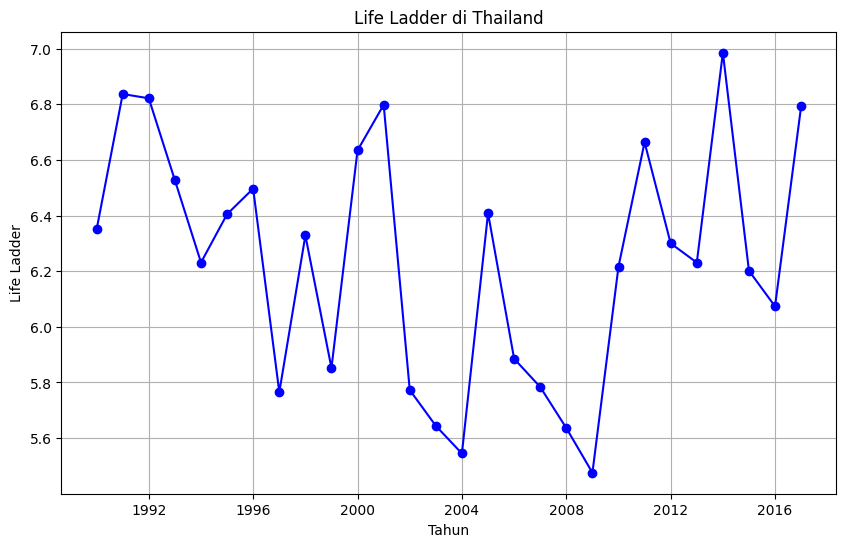

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(thai_df.index, thai_list, marker='o', linestyle='-', color='b')
plt.title('Life Ladder di Thailand')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()

### model SES

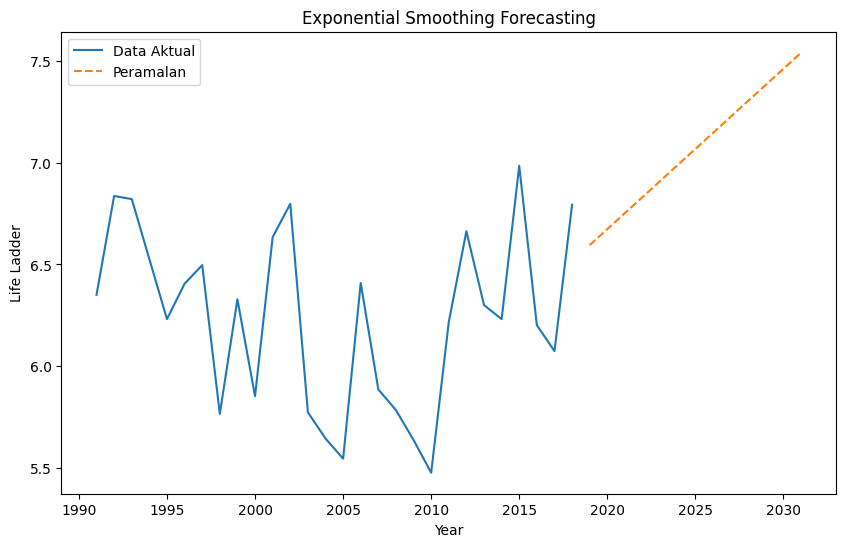

            forecast
2018-12-31  6.595181
2019-12-31  6.674056
2020-12-31  6.752931
2021-12-31  6.831805
2022-12-31  6.910680
2023-12-31  6.989555
2024-12-31  7.068429
2025-12-31  7.147304
2026-12-31  7.226179
2027-12-31  7.305054
2028-12-31  7.383928
2029-12-31  7.462803
2030-12-31  7.541678


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(thai_list), freq='Y')
life_ladder_series = pd.Series(thai_list, index=years)

# Buat model Exponential Smoothing
model = ExponentialSmoothing(life_ladder_series, trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()

# Buat prediksi untuk beberapa tahun ke depan
forecast_steps = 13
forecast = fit.forecast(steps=forecast_steps)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(forecast, label='Peramalan', linestyle='--')
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
forecast_years = pd.date_range(start=years[-1] + pd.offsets.YearBegin(), periods=forecast_steps, freq='Y')
forecast_df = pd.DataFrame({'forecast': forecast})

print(forecast_df)


### Moving Average

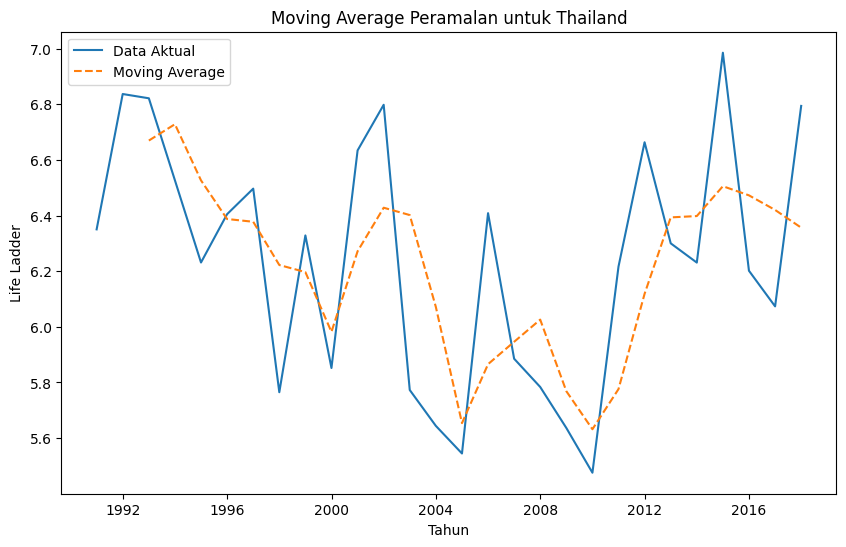

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(thai_list), freq='Y')
life_ladder_series = pd.Series(thai_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 3 tahun)
window_size = 3
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Thailand')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

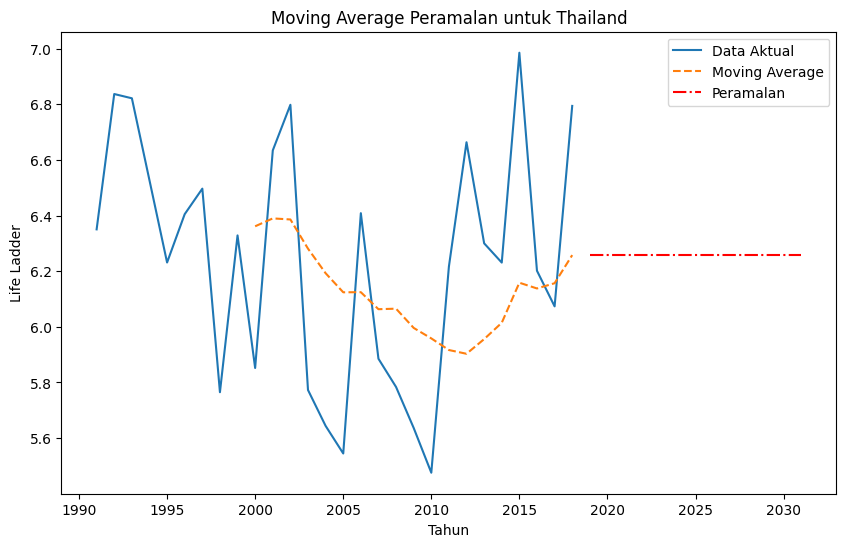

            forecast
year                
2018-12-31   6.25788
2019-12-31   6.25788
2020-12-31   6.25788
2021-12-31   6.25788
2022-12-31   6.25788
2023-12-31   6.25788
2024-12-31   6.25788
2025-12-31   6.25788
2026-12-31   6.25788
2027-12-31   6.25788
2028-12-31   6.25788
2029-12-31   6.25788
2030-12-31   6.25788


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(thai_list), freq='Y')
life_ladder_series = pd.Series(thai_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 10 tahun)
window_size = 10
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Prediksi 10 tahun ke depan
last_moving_avg = moving_average.iloc[-1]
forecast_years = pd.date_range(start=life_ladder_series.index[-1] + pd.DateOffset(years=1), periods=13, freq='Y')
forecast_values = np.full(13, last_moving_avg)

# Buat DataFrame untuk prediksi
forecast_ma = pd.DataFrame({'year': forecast_years, 'forecast': forecast_values})
forecast_ma.set_index('year', inplace=True)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.plot(forecast_ma, label='Peramalan', linestyle='-.', color='red')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Thailand')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
print(forecast_ma)

### linear regresion

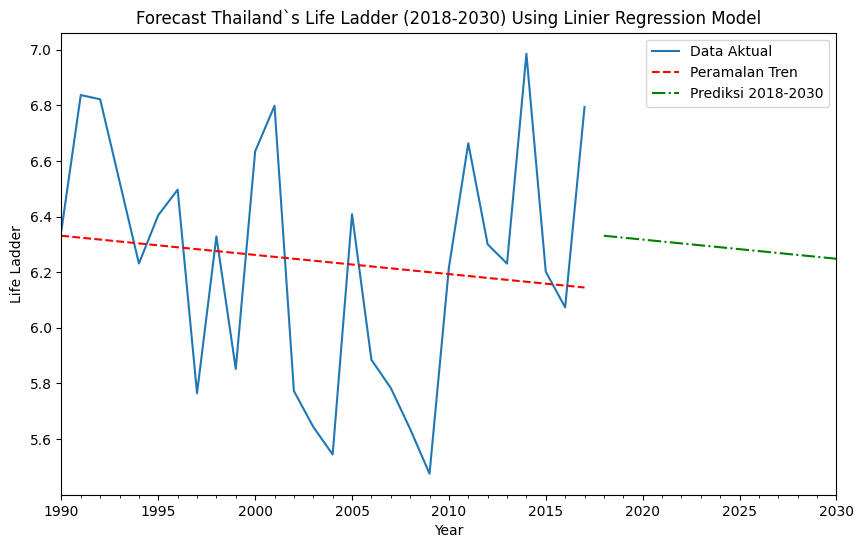

2018-12-31    6.331112
2019-12-31    6.324222
2020-12-31    6.317331
2021-12-31    6.310441
2022-12-31    6.303550
2023-12-31    6.296660
2024-12-31    6.289769
2025-12-31    6.282879
2026-12-31    6.275989
2027-12-31    6.269098
2028-12-31    6.262208
2029-12-31    6.255317
2030-12-31    6.248427
Freq: A-DEC, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import tsatools

# Membuat data Life Ladder dari daftar yang ada
years = pd.date_range(start='1990', periods=len(thai_list), freq='Y')
life_ladder_series = pd.Series(thai_list, index=years, name='Life_Ladder')

# Menambahkan tren
thai_df = tsatools.add_trend(life_ladder_series, trend='ct')

# Membangun model regresi linear
thai_lm = sm.OLS(thai_df['Life_Ladder'], thai_df[['trend', 'const']]).fit()

# Membuat data untuk prediksi dari 2018 sampai 2030
forecast_years = pd.date_range(start='2018', end='2031', freq='Y')
forecast_df = pd.DataFrame(index=forecast_years)
forecast_df = tsatools.add_trend(forecast_df, trend='ct')

# Membuat prediksi
forecast_values = thai_lm.predict(forecast_df[['trend', 'const']])

# Plot hasil
plt.figure(figsize=(10, 6))
ax = life_ladder_series.plot(title='Forecast Thailand`s Life Ladder (2018-2030) Using Linier Regression Model')
thai_lm.predict(thai_df[['trend', 'const']]).plot(ax=ax, linestyle='--', color='red')
forecast_values.plot(ax=ax, linestyle='-.', color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Life Ladder')
plt.legend(['Data Aktual', 'Peramalan Tren', 'Prediksi 2018-2030'])
plt.show()

# Menampilkan prediksi
print(forecast_values)

forecast_values.to_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/hasil_forecast/thailand_for_lr.xlsx", index=False)

### ARIMA

Forecast for Thailand's Life Ladder (2018-2030):
            forecast
2018-12-31  6.445743
2019-12-31  6.320785
2020-12-31  6.275980
2021-12-31  6.259914
2022-12-31  6.254154
2023-12-31  6.252089
2024-12-31  6.251348
2025-12-31  6.251082
2026-12-31  6.250987
2027-12-31  6.250953
2028-12-31  6.250941
2029-12-31  6.250936
2030-12-31  6.250935


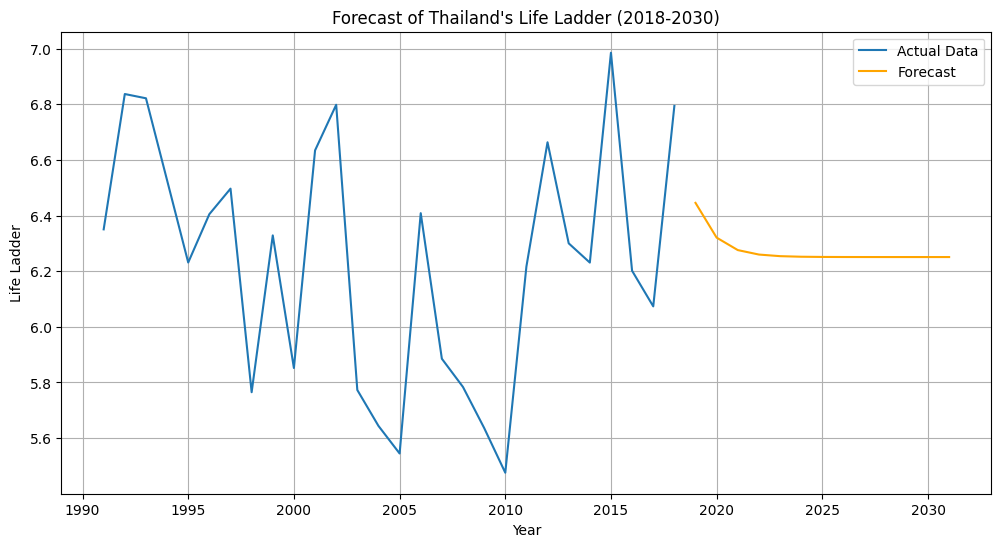

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Konversi life_ladder_list menjadi Series dengan index tahun
years = pd.date_range(start='1990', periods=len(thai_list), freq='Y')
life_ladder_series = pd.Series(thai_list, index=years)

# Misalkan model ARIMA yang sudah kita latih sebelumnya adalah ARIMA(1,1,1)
model = ARIMA(life_ladder_series, order=(1, 1, 1))
model_fit = model.fit()

# Melakukan peramalan untuk 14 tahun ke depan (dari tahun 2018 hingga 2030)
forecast = model_fit.forecast(steps=13)

# Tampilkan hasil peramalan
print("Forecast for Thailand's Life Ladder (2018-2030):")
forecast_years = pd.date_range(start='2018-01-01', periods=13, freq='Y')
forecast_arima = pd.DataFrame({'forecast': forecast})
print(forecast_arima)

# Visualisasikan hasil peramalan
plt.figure(figsize=(12, 6))
plt.plot(life_ladder_series, label='Actual Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("Forecast of Thailand's Life Ladder (2018-2030)")
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend()
plt.grid(True)
plt.show()


## Evaluation Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Buat DataFrame baru dengan life_ladder_list dan tahun sebagai indeks
thai_df_new = pd.DataFrame({'Life_Ladder': thai_list}, index=years)

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = thai_df_new.index.year.values.reshape(-1, 1)  # Ambil tahun dari indeks DataFrame
y = thai_df_new['Life_Ladder'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Regresi Linier
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
forecast_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, forecast_lr)
mape_lr = np.mean(np.abs((y_test - forecast_lr) / y_test)) * 100
rmse_lr = np.sqrt(mean_squared_error(y_test, forecast_lr))


In [14]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = life_ladder_series.index.to_numpy().reshape(-1, 1)  # Menggunakan tahun sebagai fitur
y = life_ladder_series.values  # Life Ladder sebagai target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model SES
model_ses = ExponentialSmoothing(y_train, trend='add', seasonal=None, seasonal_periods=None)
fit_ses = model_ses.fit()
forecast_ses = fit_ses.forecast(steps=len(X_test))
mae_ses = mean_absolute_error(y_test, forecast_ses)
mape_ses = np.mean(np.abs((y_test - forecast_ses) / y_test)) * 100
rmse_ses = np.sqrt(mean_squared_error(y_test, forecast_ses))

# Model ARIMA
model_arima = ARIMA(y_train, order=(1, 1, 1))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=len(X_test))
mae_arima = mean_absolute_error(y_test, forecast_arima)
mape_arima = np.mean(np.abs((y_test - forecast_arima) / y_test)) * 100
rmse_arima = np.sqrt(mean_squared_error(y_test, forecast_arima))

# Model MA
window_size = 3
thai_df['Moving Average'] = thai_df['Life_Ladder'].rolling(window=window_size, min_periods=1).mean()
actual_data = thai_df['Life_Ladder']
ma_forecast = thai_df['Moving Average']
mae_ma = mean_absolute_error(actual_data, ma_forecast)
mape_ma = np.mean(np.abs((actual_data - ma_forecast) / actual_data)) * 100
rmse_ma = np.sqrt(mean_squared_error(actual_data, ma_forecast))


In [15]:
print(forecast_lr)
print(forecast_ses)
print(forecast_arima)
print(ma_forecast.tail(20))

[6.28661363 6.12440306 6.29675179 6.1649557  6.37785707 6.25619914
 6.20550834 6.15481754 6.2663373 ]
[6.06674744 6.04913783 6.03152823 6.01391863 5.99630903 5.97869942
 5.96108982 5.94348022 5.92587062]
[5.89335692 6.1455703  6.04017096 6.08421708 6.06581032 6.07350246
 6.07028793 6.07163128 6.0710699 ]
1998-12-31    6.196892
1999-12-31    5.981976
2000-12-31    6.271762
2001-12-31    6.428287
2002-12-31    6.401921
2003-12-31    6.071827
2004-12-31    5.653980
2005-12-31    5.865859
2006-12-31    5.946298
2007-12-31    6.026002
2008-12-31    5.768598
2009-12-31    5.632003
2010-12-31    5.776273
2011-12-31    6.118652
2012-12-31    6.393516
2013-12-31    6.398290
2014-12-31    6.505575
2015-12-31    6.472750
2016-12-31    6.420289
2017-12-31    6.356550
Freq: A-DEC, Name: Moving Average, dtype: float64


In [16]:
# Buat DataFrame untuk menyimpan hasil evaluasi
eval_metrics = pd.DataFrame({
    'Model': ['SES','Linier Regresion', 'Moving Average', 'ARIMA'],
    'MAE': [mae_ses,mae_lr, mae_ma, mae_arima],
    'MAPE (%)': [mape_ses, mape_lr, mape_ma, mape_arima],
    'RMSE': [rmse_ses, rmse_lr, rmse_ma, rmse_arima]
})

# Tampilkan DataFrame evaluasi
print("Evaluation Metrics:")
print(eval_metrics)

Evaluation Metrics:
              Model       MAE  MAPE (%)      RMSE
0               SES  0.364486  5.697027  0.430421
1  Linier Regresion  0.294672  4.764863  0.359094
2    Moving Average  0.270055  4.321760  0.320086
3             ARIMA  0.310306  4.869974  0.373916


In [17]:
print(thai_list)

[6.350469669931655, 6.837006969824986, 6.821661606790983, 6.526744240772238, 6.231334699260777, 6.405052399402903, 6.496886243509781, 5.765041096206785, 6.328749020247231, 5.852138850525837, 6.634397553129165, 6.798323642889323, 5.773041821492196, 5.644117000573273, 5.544780127411639, 6.408681314896038, 5.885432720184326, 5.783891201019287, 5.636471271514893, 5.475645065307617, 6.216702938079834, 6.663609027862549, 6.300235271453857, 6.231024742126465, 6.985463619232178, 6.201762676239014, 6.073639869689941, 6.794246230047316]


In [18]:

# Data aktual dan prediksi dari masing-masing model
actual_values = [5.475645065307617, 6.216702938079834, 6.663609027862549, 6.300235271453857, 6.231024742126465, 6.985463619232178, 6.201762676239014, 6.073639869689941, 6.794246230047316]
ses_forecast = [6.06674744, 6.04913783, 6.03152823, 6.01391863, 5.99630903, 5.97869942, 5.96108982, 5.94348022, 5.92587062]
ma_forecast = [4.242920, 4.237954, 4.137641, 4.067002, 3.911466, 3.818826, 3.906646, 4.168910, 4.172565]
lr_forecast = [6.28661363, 6.12440306, 6.29675179, 6.1649557, 6.37785707, 6.25619914, 6.20550834, 6.15481754, 6.2663373 ]
arima_forecast = [5.632003, 5.776273, 6.118652, 6.393516, 6.398290, 6.505575, 6.472750, 6.420289, 6.356550]

# Tanggal mulai dan akhir
start_date = '2009-01-01'
end_date = '2018-01-01'

# Buat range tanggal dari start_date hingga end_date
date_range = pd.date_range(start=start_date, end=end_date, freq='Y')

# Buat DataFrame untuk tabel prediksi dengan kolom tahun
predictions_table = pd.DataFrame({
    'Year': date_range,
    'Actual': actual_values,
    'SES Forecast': forecast_ses,
    'Linier Regresion Forecast' : forecast_lr,
    'MA Forecast': ma_forecast,
    'ARIMA Forecast': forecast_arima
})
# Menampilkan tabel hasil prediksi
print("Hasil Prediksi:")
predictions_table

Hasil Prediksi:


,Year,Actual,SES Forecast,Linier Regresion Forecast,MA Forecast,ARIMA Forecast
0,2009-12-31,5.475645,6.066747,6.286614,4.242920,5.893357
1,2010-12-31,6.216703,6.049138,6.124403,4.237954,6.145570
2,2011-12-31,6.663609,6.031528,6.296752,4.137641,6.040171
3,2012-12-31,6.300235,6.013919,6.164956,4.067002,6.084217
4,2013-12-31,6.231025,5.996309,6.377857,3.911466,6.065810
5,2014-12-31,6.985464,5.978699,6.256199,3.818826,6.073502
6,2015-12-31,6.201763,5.961090,6.205508,3.906646,6.070288
7,2016-12-31,6.073640,5.943480,6.154818,4.168910,6.071631
8,2017-12-31,6.794246,5.925871,6.266337,4.172565,6.071070
